In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pyusadel import DifferentialOperators, UsadelProblem, gradient, laplacian

In [2]:
# Grid
Nx = 801
x = np.linspace(-4, 4, Nx)
dx = x[1] - x[0]

# Exhange field
h_x = np.zeros((Nx), dtype=float)
h_x[: Nx // 2] = 0.5
h_x[Nx // 2 :] = 0 # 1.4

h_y = np.zeros((Nx), dtype=float)

h_z = np.zeros((Nx), dtype=float)

# spin-flip and spin-orbit terms
tau_sf_inv = np.zeros((Nx), dtype=float)
tau_so_inv = np.zeros((Nx), dtype=float)

# Initial guess for Delta
Delta_init = np.ones((Nx), dtype=float)
#Delta_init[: Nx // 2] += 1.764

# Diffusion constant
D = 1.7655

# Temperature
T = 0.2

# Dynes
Gamma = 1e-2

In [3]:
do = DifferentialOperators()
do.D_x = gradient(Nx, dx, boundary_condition="open")
do.D_y = np.zeros((Nx, Nx), dtype=float)
do.D_z = np.zeros((Nx, Nx), dtype=float)
do.L = laplacian(Nx, dx, boundary_condition="open")

up = UsadelProblem(
    Nsites=Nx,
    diff_ops=do,
    h_x=h_x,
    h_y=h_y,
    h_z=h_z,
    tau_sf_inv=tau_sf_inv,
    tau_so_inv=tau_so_inv,
    D=D,
    T=T,
    Gamma=Gamma,
    use_dense=False,
)
up.Delta = Delta_init

In [4]:
h_c0 = up.h_c0
xi_00 = up.xi_00
Delta_00 = up.Delta_00

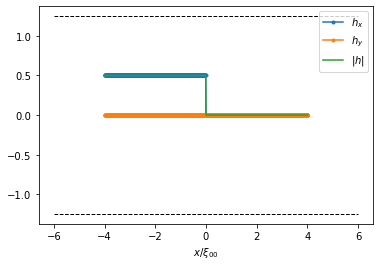

In [5]:
fig, ax = plt.subplots()
ax.hlines([h_c0, -h_c0], -6, 6, colors="k", linestyles="--", linewidth=1)
ax.plot(x / xi_00, h_x, ".-", label=r"$h_x$")
ax.plot(x / xi_00, h_y, ".-", label=r"$h_y$")
ax.plot(x / xi_00, np.sqrt(h_x**2 + h_y**2), "-", label=r"$|h|$")
ax.set_xlabel(r"$x / \xi_{00}$")
ax.legend()

## Gap equation solver

In [6]:
# Uncomment to activate self-consistency
#up.solve_self_consistent(verbose=True)

In [7]:
#cc_idx = np.argsort(np.abs(np.abs(h_x) - h_c0))

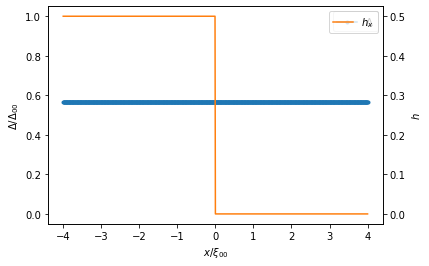

In [8]:
fig, ax = plt.subplots()
ax.plot(x / xi_00, up.Delta / Delta_00, ".-C0", label=r"$\Delta$")
ax.set_ylabel(r"$\Delta / \Delta_{00}$")
# ax.vlines(x[cc_idx[0]] / xi_00, 0, 1, colors="k", linestyles="--", linewidth=0.5)
# ax.vlines([x[cc_idx[1]]/xi_00], 0, 1, colors="-k", linestyles="--", linewidth=1)
ax.plot(
    x / xi_00,
    up.Delta[Nx // 2 + 10] / Delta_00
    + (np.diff(up.Delta / Delta_00) / (x[1] - x[0]))[Nx // 2 + 10]
    * (x - x[Nx // 2 + 10]),
    "C0--",
)

ax.set_ylim(-0.05, 1.05)
ax.set_xlabel(r"$x/\xi_{00}$")

ax2 = ax.twinx()
# ax2.hlines([+h_c0], -6, 6, colors="k", linestyles="--", linewidth=0.5)
# ax2.hlines([-h_c], -6, 6, colors="k", linestyles="--", linewidth=1)

ax2.plot(x / xi_00, h_x, "-C1", label=r"$h_x$")
#ax2.plot(x / xi_00, h_y, "-C2", label=r"$h_y$")
ax2.set_ylabel(r"$h$")

ax.legend()
ax2.legend()

## Spectrum solver

In [9]:
up.set_real_omega_ax(-2, 2, 301)
up.solve_spectral(
    tol=1e-5,
    max_iter=1000,
    print_exit_status=True,
)

omega=2.00 : converged.
omega=1.99 : converged.
omega=1.97 : converged.
omega=1.96 : converged.
omega=1.95 : converged.
omega=1.93 : converged.
omega=1.92 : converged.
omega=1.91 : converged.
omega=1.89 : converged.
omega=1.88 : converged.
omega=1.87 : converged.
omega=1.85 : converged.
omega=1.84 : converged.
omega=1.83 : converged.
omega=1.81 : converged.
omega=1.80 : converged.
omega=1.79 : converged.
omega=1.77 : converged.
omega=1.76 : converged.
omega=1.75 : converged.
omega=1.73 : converged.
omega=1.72 : converged.
omega=1.71 : converged.
omega=1.69 : converged.
omega=1.68 : converged.
omega=1.67 : converged.
omega=1.65 : converged.
omega=1.64 : converged.
omega=1.63 : converged.
omega=1.61 : converged.
omega=1.60 : converged.
omega=1.59 : converged.
omega=1.57 : converged.
omega=1.56 : converged.
omega=1.55 : converged.
omega=1.53 : converged.
omega=1.52 : converged.
omega=1.51 : converged.
omega=1.49 : converged.
omega=1.48 : converged.
omega=1.47 : converged.
omega=1.45 : con

In [10]:
omega_ax = up.get_omega_ax_r()
DOS = up.get_dos()
DOSu, DOSd = up.get_spin_resolved_dos("x")

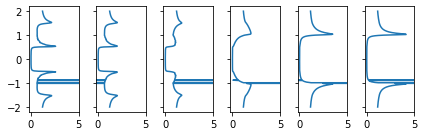

In [11]:
fig, ax = plt.subplots(ncols=6, figsize=(6, 2), sharey=True)

ax[0].plot(
    DOS[:, Nx // 5 * 0 + 10],
    omega_ax,
)
ax[1].plot(
    DOS[:, Nx // 5 * 1],
    omega_ax,
)
ax[2].plot(
    DOS[:, Nx // 5 * 2],
    omega_ax,
)
ax[3].plot(
    DOS[:, Nx // 5 * 3],
    omega_ax,
)

ax[4].plot(
    DOS[:, Nx // 5 * 4],
    omega_ax,
)

ax[5].plot(
    DOS[:, -1],
    omega_ax,
)

for sax in ax:
    sax.set_xlim(-0.2, 5)


fig.tight_layout()

(-2.0, 2.0)

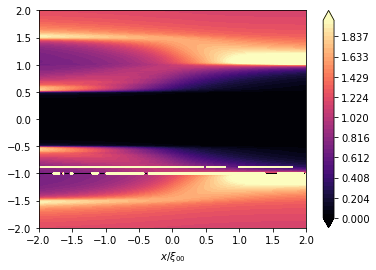

In [12]:
fig, ax = plt.subplots()

im = ax.contourf(
    x / xi_00, omega_ax, DOS, extend="both", levels=np.linspace(0, 2), cmap="magma"
)
fig.colorbar(im)

ax.set_xlabel(r"$x / \xi_{00}$")
ax.set_xlim(-2, 2)

In [13]:
mM = omega_ax[np.argmax(DOSu - DOSd, axis=0)]
mm = omega_ax[np.argmin(DOSu - DOSd, axis=0)]

(-2.0, 2.0)

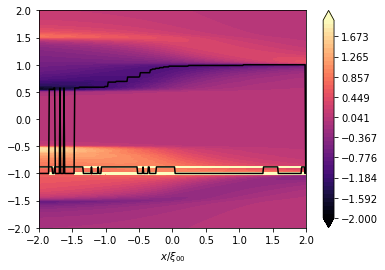

In [14]:
fig, ax = plt.subplots()

im = ax.contourf(
    x / xi_00, omega_ax, DOSu - DOSd, extend="both", levels=np.linspace(-2, 2), cmap="magma"
)
fig.colorbar(im)

plt.plot(x, mm, '-k')
plt.plot(x, mM, '-k')

ax.set_xlabel(r"$x / \xi_{00}$")
ax.set_xlim(-2, 2)

In [15]:
gaussian = np.exp(-(x/xi_00)**2/(2))/np.sqrt(2*np.pi)

In [16]:
gaussian /= np.sum(gaussian)

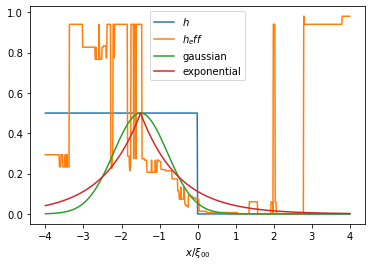

In [17]:
plt.plot(x/xi_00, h_x, label=r"$h$")
#plt.plot(x/xi_00, np.convolve(h_x, gaussian, mode='same', ))

plt.plot(x/xi_00, 1-np.abs((mM-mm))/2, label=r"$h_eff$")
plt.plot(x/xi_00, np.exp(-(x/xi_00+1.5)**2)*0.5, label="gaussian")
plt.plot(x/xi_00, np.exp(-np.abs(x/xi_00+1.5))*0.5, label="exponential")

plt.xlabel(r"$x/\xi_{00}$")
plt.legend()
#plt.ylabel(r"$h_\mathrm{eff}$")

/tmp/ipykernel_27330/1443098415.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(x/xi_00, np.sqrt(-np.log(1-np.abs((mM-mm))/2)))


Text(0, 0.5, '$\\ln h_\\mathrm{eff}$')

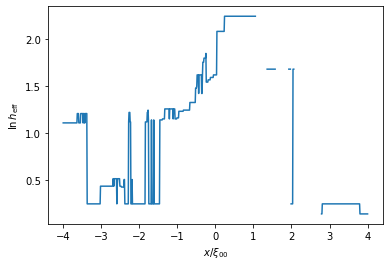

In [18]:
plt.plot(x/xi_00, np.sqrt(-np.log(1-np.abs((mM-mm))/2)))
plt.xlabel(r"$x/\xi_{00}$")
plt.ylabel(r"$\ln h_\mathrm{eff}$")

In [19]:
import numpy as np
from pyusadel import (
    DifferentialOperators,
    UsadelProblem,
    gen_assemble_fns,
    solve_usadel,
    trivial_diffops,
)
from scipy.optimize import curve_fit


def fit_nsts_modified(
    e_ax,
    dos,
    initial_guess,
    bounds,
    Gamma,
    verbose: bool = False,
    solution=None,
):
    """Fit the experimental data.

    Parameters:
    -------
    e_ax_exp : np.ndarray
        Energy axis of the experimental data.
    dos_exp : np.ndarray
        Spectroscopy data.
    initial_guess: tuple
        Initial guess for the paramteres
    bounds : tuple(tuple, tuple)
        Bounds on the parameters
    tol : float
        Objective tolerance.
    verbose : bool
        Whether printing the status.
    solution : tuple(np.array, np.array)
        Variables (theta, M_x). If provided, the program will use those
        variable for the optimization. Useful to provide as initial guess
        the results of a previous optimization.
    """

    do = trivial_diffops()

    if solution:
        theta, M_x = solution
    else:
        theta = np.ones((e_ax.shape[0], 1), dtype=complex)
        M_x = np.zeros((e_ax.shape[0], 1), dtype=complex)

    def wrapper(e_ax_exp, *params):

        Delta, h, tau_sf_inv = params

        if verbose:
            print(
                f"""Delta = {Delta:4.3f}, h = {h:4.3f}, tau_sf_inv = {tau_sf_inv:4.3f}"""  # ,  tau_so_inv = {tau_so_inv:4.3f}"""
            )

        assemble_fns = gen_assemble_fns(
            D=0,
            diff_ops=do,
            h_x=h,
            h_y=0,
            h_z=0,
            tau_so_inv=0,
            tau_sf_inv=tau_sf_inv,
            Gamma=Gamma,
        )

        solve_usadel(
            assemble_fns=assemble_fns,
            h_x=h,
            h_y=0,
            h_z=0,
            theta=theta,
            M_x=M_x,
            M_y=0,
            M_z=0,
            Delta=Delta,
            omega_ax=-1j * e_ax,
            gamma=1.0,
            max_iter=1000,
            print_exit_status=False,
            use_dense=True,
        )

        M_0 = np.sqrt(1 + M_x**2)
        
        return np.real(M_0 * np.cos(theta))[0, :]

    verbosity = 2 if verbose else 0

    fit_results = curve_fit(
        f=wrapper,
        xdata=e_ax,
        ydata=dos,
        p0=initial_guess,
        # sigma=None,
        # absolute_sigma=False,
        check_finite=True,
        bounds=bounds,
        # method="trf",
        # jac=None,
        # full_output=True,
        verbose=verbosity,
        ftol=1e-6,
        xtol=1e-6,
        gtol=1e-6,
        x_scale="jac",
    )

    return fit_results

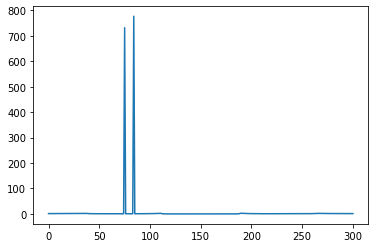

In [20]:
plt.plot(DOS[:, 0])

In [21]:
dos = DOS[:, 0]
    
fit_nsts_modified(
    omega_ax,
    dos,
    initial_guess = (0.1, 1, 1),
    bounds = ((0, 0, 0), (1, 1, 1)),
    Gamma = 1e-5,
    verbose = True
)

Delta = 0.100, h = 1.000, tau_sf_inv = 1.000
Delta = 0.100, h = 1.000, tau_sf_inv = 1.000
Delta = 0.100, h = 1.000, tau_sf_inv = 1.000
Delta = 0.100, h = 1.000, tau_sf_inv = 1.000
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.6861e+05                                    2.74e+01    
Delta = 0.996, h = 1.000, tau_sf_inv = 0.004
Delta = 0.996, h = 1.000, tau_sf_inv = 0.004
Delta = 0.996, h = 1.000, tau_sf_inv = 0.004
Delta = 0.996, h = 1.000, tau_sf_inv = 0.004
       1              2         5.6578e+05      2.83e+03       1.34e+00       6.82e+02    
Delta = 0.999, h = 1.000, tau_sf_inv = 0.001
Delta = 0.999, h = 1.000, tau_sf_inv = 0.001
Delta = 0.999, h = 1.000, tau_sf_inv = 0.001
Delta = 0.999, h = 1.000, tau_sf_inv = 0.001
       2              3         5.6514e+05      6.44e+02       3.72e-03       3.38e+02    
Delta = 0.999, h = 1.000, tau_sf_inv = 0.001
Delta = 0.999, h = 1.000, tau_sf_inv = 0.001
Delta 

(array([9.99159895e-01, 1.00000000e+00, 9.34146100e-04]),
 array([[ 3.48399497e+08, -1.12379418e+11, -4.74497756e+09],
        [-1.12379418e+11,  3.62490004e+13,  1.53053555e+12],
        [-4.74497756e+09,  1.53053555e+12,  6.46235492e+10]]))